In [267]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook


In [268]:
data_path = 'dados_brutos.csv'
df_data = pd.read_csv(data_path)

In [269]:
df_data.tail(2)

,Cod,Ano,Dia Juliano,Hora - minuto,Veloc. Instantânea do Vento a 5 metros (m/s),Veloc. Instantânea do Vento a 2 metros (m/s),Direção do Vento no instante da aquisição (°),Radiação Incidente total de 10 leituras (KW/m2),Radiação Refletida Total de 10 leituras (KW/m2),Fluxo Positivo de calor no solo total de 10 leituras (W/m2),Fluxo negativo de calor no solo total de 10 leituras (W/m2),Umidade relativa Média (%),Temperatura do Ar Média (°C),Temperatura do solo 1 Média (°C) à 3cm no solo,Temperatura do solo 2Média (°C) à 6cm no solo,Temperatura do solo 3Média (°C) Colocado sensor de UV em 31/07/09,Pressão (hPa),Chuva total do período (mm)
1138024,111,2018,365,2350,4.105,2.54,175.4,0.0,0.0,0.0,-6999.0,81.0,22.31,6999.0,6999.0,-0.082,938.0,0.0
1138025,111,2018,365,2400,4.211,2.63,119.5,0.0,0.0,0.0,-6999.0,81.3,22.23,6999.0,6999.0,-0.080,938.0,0.0


In [270]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138026 entries, 0 to 1138025
Data columns (total 18 columns):
Cod                                                                  1138026 non-null int64
Ano                                                                  1138026 non-null int64
Dia Juliano                                                          1138026 non-null int64
Hora - minuto                                                        1138026 non-null int64
Veloc. Instantânea do Vento a 5 metros (m/s)                         1138026 non-null float64
Veloc. Instantânea do Vento a 2 metros (m/s)                         1138026 non-null float64
Direção do Vento no instante da aquisição (°)                        1138026 non-null float64
Radiação Incidente total de 10 leituras (KW/m2)                      1138026 non-null float64
Radiação Refletida Total de 10 leituras (KW/m2)                      1138026 non-null float64
Fluxo Positivo de calor no solo total de 10 leitu

In [271]:
df_data = df_data[(df_data.Ano>2016) & (df_data.Ano<2019)]
df_data['Ano']

1035001    2017
1035002    2017
1035003    2017
1035004    2017
1035005    2017
           ... 
1138021    2018
1138022    2018
1138023    2018
1138024    2018
1138025    2018
Name: Ano, Length: 103025, dtype: int64

In [272]:
def jdtodatestd (year_array,jday_array,time_array):
    date_array = []
    for i in range(len(year_array)):
        h_m = str(time_array[i])
        m = h_m[-2:]
        h = h_m[:-2]
        if( len(h_m) == 2 or h == '24' ):
            h = '00'
        jdate = str(year_array[i])+str(jday_array[i])+h+m
        fmt = '%Y%j%H%M'
        date_array.append(datetime.strptime(jdate, fmt))
    return date_array

In [273]:
df_data['ts'] = jdtodatestd(df_data['Ano'].values,df_data['Dia Juliano'].values,df_data['Hora - minuto'].values)
df_data['ts']

1035001   2017-04-10 01:00:00
1035002   2017-04-10 02:00:00
1035003   2017-04-10 03:00:00
1035004   2017-04-10 04:00:00
1035005   2017-04-10 05:00:00
                  ...        
1138021   2018-12-31 23:20:00
1138022   2018-12-31 23:30:00
1138023   2018-12-31 23:40:00
1138024   2018-12-31 23:50:00
1138025   2018-12-31 00:00:00
Name: ts, Length: 103025, dtype: datetime64[ns]

In [274]:
df_util = df_data[['ts','Temperatura do Ar Média (°C)','Umidade relativa Média (%)']]
df_util = df_util.set_index('ts')
df_util.columns = ['Temperatura', 'Umidade']
df_util.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103025 entries, 2017-04-10 01:00:00 to 2018-12-31 00:00:00
Data columns (total 2 columns):
Temperatura    103025 non-null float64
Umidade        103025 non-null float64
dtypes: float64(2)
memory usage: 2.4 MB


In [275]:
df_util.describe()

,Temperatura,Umidade
count,103025.000000,103025.000000
mean,21.542435,65.751484
std,44.007058,18.701944
min,-6999.000000,5.689000
25%,18.490000,52.270000
50%,21.230000,69.600000
75%,25.220000,80.300000
max,35.530000,100.000000


In [276]:
df_util = df_util[df_util['Temperatura']>0]

<IPython.core.display.Javascript object>


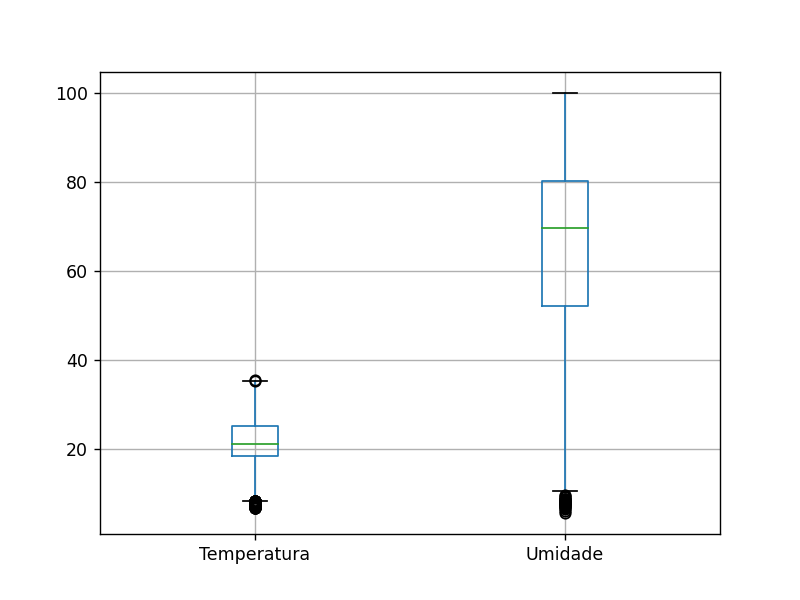

In [277]:
df_util.boxplot()

In [279]:
df_util_1H = df_util.resample('1H').mean()
df_util_1H = df_util_1H[df_util_1H.index.year != 2019]
df_util_1H = df_util_1H[df_util_1H.index.month != 1]
df_util_1H

,Temperatura,Umidade
ts,,
2017-02-01 00:00:00,22.200000,84.800000
2017-02-01 01:00:00,22.090000,85.700000
2017-02-01 02:00:00,22.010000,86.200000
2017-02-01 03:00:00,21.900000,86.700000
2017-02-01 04:00:00,21.640000,87.800000
...,...,...
2018-12-31 19:00:00,27.980000,62.733333
2018-12-31 20:00:00,25.134286,71.327143
2018-12-31 21:00:00,23.837143,75.842857


<IPython.core.display.Javascript object>


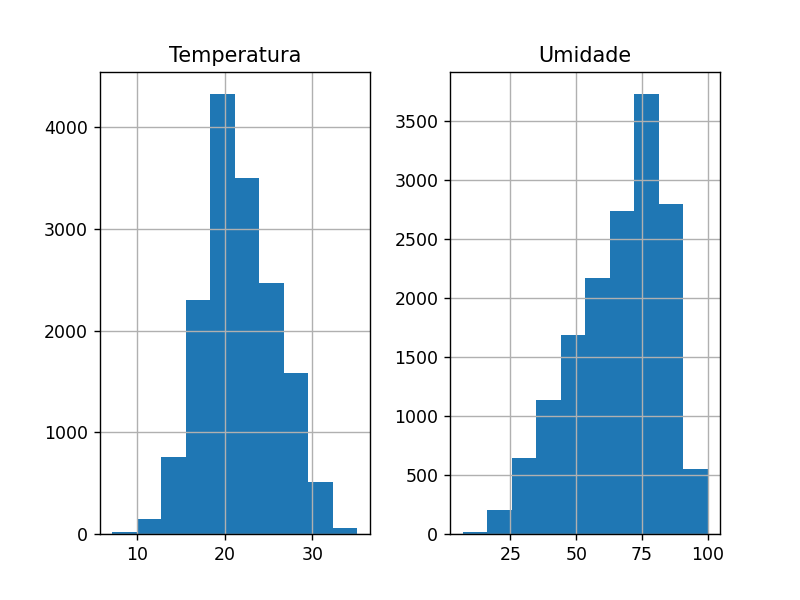

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B721295E08>,
      dtype=object)

In [280]:
df_util_1H.hist()

<IPython.core.display.Javascript object>


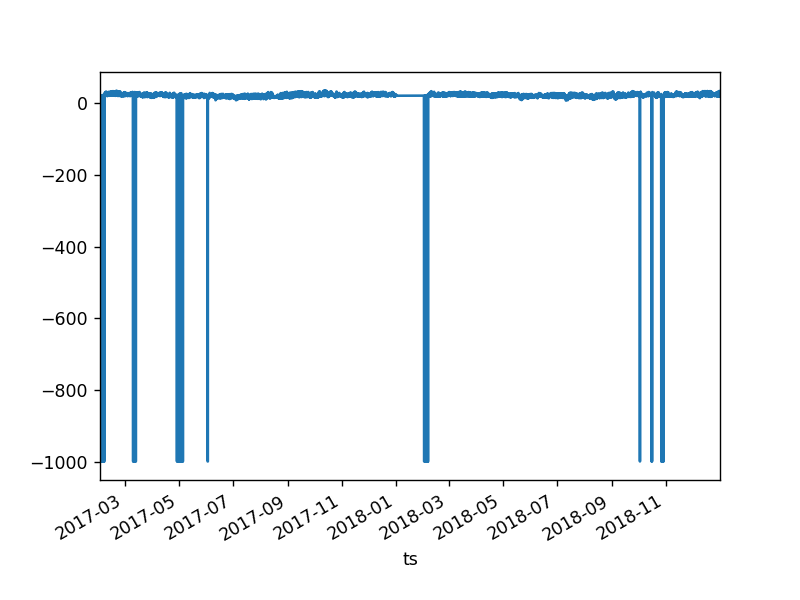

In [286]:
df_util_1H['Temperatura'].plot()

<IPython.core.display.Javascript object>


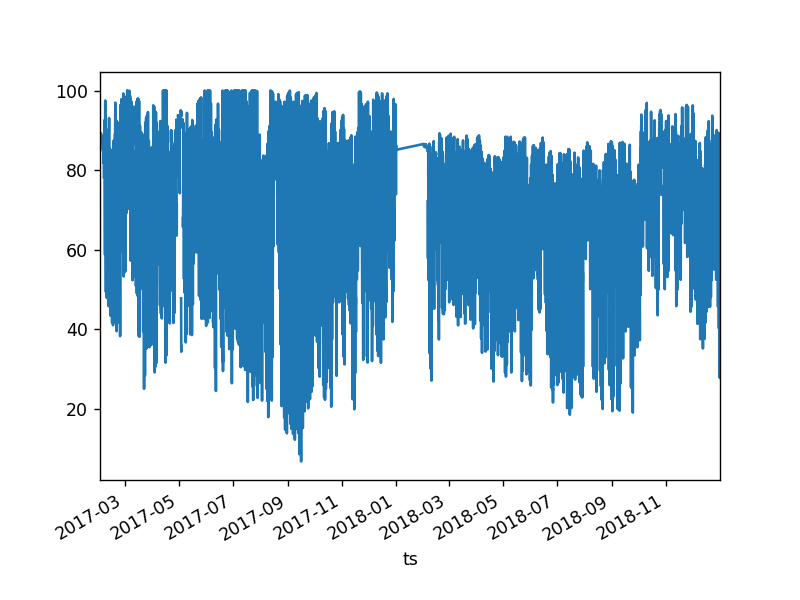

In [282]:
df_util_1H['Umidade'].plot()

In [283]:
df_util_1H.dropna()

In [284]:
df_util_1H.describe()


,Temperatura,Umidade
count,16032.000000,16032.000000
mean,-0.015296,43.718632
std,147.551818,154.900863
min,-999.000000,-999.000000
25%,18.708304,53.281429
50%,21.210000,69.176905
75%,24.571905,79.742857
max,35.118333,100.000000


In [285]:
df_util_1H.to_csv('dataset.csv')